# Testing charge-neutrality of the compositions in the GNoME database

 In this notebook, we will check the charge-neutrality of the compositions in the GNoME database (https://www.nature.com/articles/s41586-023-06735-9).
 
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WMD-group/SMACT/blob/master/examples/smact_validity/Checking_smact_validity_of_GNoME.ipynb)

In [1]:
# Install the required packages
try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !pip install git+https://github.com/WMD-group/SMACT.git --quiet
!pip install pandarallel --quiet # Required for parallel processing

In [2]:
# Imports
from smact.screening import smact_validity
import matplotlib.pyplot as plt
import pandas as pd
from pandarallel import pandarallel


def initialize_parallel_processing():
    """
    Initialize parallel processing using pandarallel.

    This function sets up pandarallel for parallel processing of pandas operations,
    enabling a progress bar for better visibility of the computation progress.
    """
    pandarallel.initialize(progress_bar=True)


# Set up parallel processing
initialize_parallel_processing()

# The imported modules and functions are used as follows:
# - smact_validity: To check the charge neutrality of compositions
# - matplotlib.pyplot: For creating plots and visualizations
# - pandas: For data manipulation and analysis
# - pandarallel: To enable parallel processing of pandas operations

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
# Load the data
# Load the data into a dataframe

data_path = "https://raw.githubusercontent.com/WMD-group/SMACT/master/examples/smact_validity/stable_materials_hull.csv"
df = pd.read_csv(data_path)

# Get quick info about the data
print(df.info())

# Show first five entries
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384871 entries, 0 to 384870
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 384871 non-null  int64  
 1   Composition                384871 non-null  object 
 2   Formation Energy Per Atom  384871 non-null  float64
 3   Corrected Energy           384871 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ MB
None


,Unnamed: 0,Composition,Formation Energy Per Atom,Corrected Energy
0,0,Cs1S6Zr3,-1.9058,-70.4155
1,1,Nd7Os1Pr3Si5,-0.5004,-94.0804
2,2,Ce2La3Pt16Tm15,-1.2960,-237.6016
3,3,Mn1Ni1Os2Sb12Yb1,-0.3064,-93.6931
4,4,Er8Ge4Si12Zr12,-0.8718,-254.0953


`smact_validity` uses the python package `SMACT` to test for charge neutrality, but it is a rather simple function which cannot account for elements with mixed valency in a compound. The working principle behind this function is to systematically trial all the possible oxidation states of the elements in a given material and return True if a charge-balanced set of oxidation states can be found.

In [4]:
# Run the SMACT validity test on the GNoME materials
df["smact_valid"] = df["Composition"].parallel_apply(smact_validity)  # Alloys will pass the test
df.head()

,Unnamed: 0,Composition,Formation Energy Per Atom,Corrected Energy,smact_valid
0,0,Cs1S6Zr3,-1.9058,-70.4155,False
1,1,Nd7Os1Pr3Si5,-0.5004,-94.0804,False
2,2,Ce2La3Pt16Tm15,-1.2960,-237.6016,True
3,3,Mn1Ni1Os2Sb12Yb1,-0.3064,-93.6931,True
4,4,Er8Ge4Si12Zr12,-0.8718,-254.0953,True


## Plotting the results

Let's plot the number of materials that pass the SMACT validity test and the total number of materials in the GNoME database.

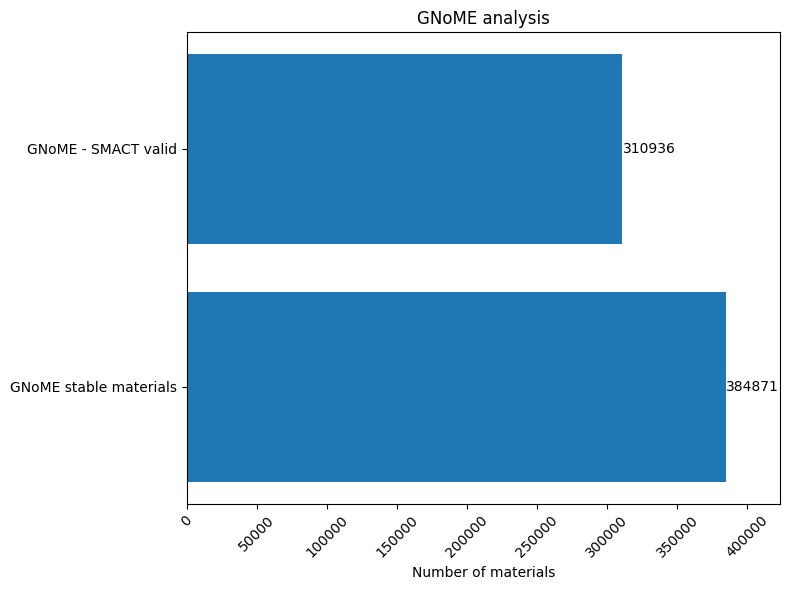

In [5]:
# Make a bar plot of the GNoME data
bar_labels = ["GNoME stable materials", "GNoME - SMACT valid"]
counts = [len(df), df["smact_valid"].sum()]


fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.barh(bar_labels, counts)
ax.bar_label(bars)
ax.set_xlabel("Number of materials")
ax.set_title("GNoME analysis")
plt.xticks(rotation=45)
ax.set_xlim(right=max(counts) * 1.1)  # Adjust x-axis limit based on data
plt.tight_layout()
plt.show()

## Conclusion
The SMACT validity test is a simple test that can be used to check the charge-neutrality of a material. However, it is not perfect and cannot account for elements with mixed valency in a compound. In this notebook, we have used the SMACT validity test to check the charge-neutrality of the compositions in the GNoME database. We found around 81% the materials in the GNoME database can be charged-balanced using SMACT.